# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [5]:
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2 - df.p1
df_sample = df.head()  
df_sample.style.format(precision=1, decimal=',')



,p1,p2,média,evolução
0,"7,0","7,9","5,3","1,0"
1,"2,9","5,1","3,4","2,2"
2,"2,3","1,0","0,7","-1,3"
3,"5,5","4,5","3,0","-1,0"
4,"7,2","8,9","6,0","1,7"


In [6]:
corr = np.corrcoef(df.p1,df.p2)
corr[0,1]

0.8957365818728046

In [7]:
corr = np.corrcoef(df.média,df.evolução)
corr[0,1]

0.3450913713308441

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [11]:
df['soma'] = df.p2 + df.p1
df_with_soma = df.head(5) 
df_with_soma.style.format(precision=1, decimal=',')


,p1,p2,média,evolução,soma
0,"7,0","7,9","5,3","1,0","14,9"
1,"2,9","5,1","3,4","2,2","8,0"
2,"2,3","1,0","0,7","-1,3","3,2"
3,"5,5","4,5","3,0","-1,0","10,0"
4,"7,2","8,9","6,0","1,7","16,1"


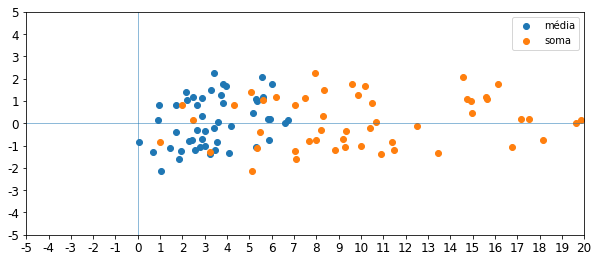

In [12]:
#Melhor figura que explica o problema
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a média
plt.scatter(df['média'], df['evolução'], label='média')

# Plotar a soma
plt.scatter(df['soma'], df['evolução'], label='soma')

#Legenda
plt.legend()

In [13]:
corr = np.corrcoef(df.soma,df.evolução)
corr[0,1]

0.13347385411788837

In [16]:
#Neste caso, a plotagem vertical é menos adequada para responder a pergunta
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1] #a diferença para o 1 codigo é q aqui ta plotando o vetor deitado
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'média')
    plt.scatter(x = df['média'], y=df['soma'], label = 'soma')

    ax.legend(loc='upper left')

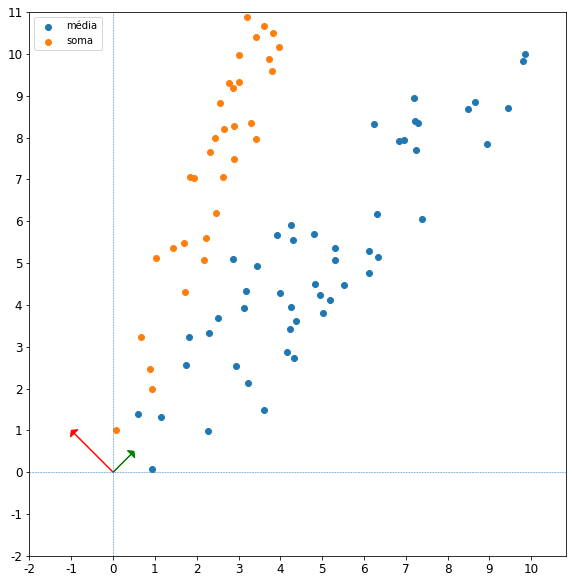

In [17]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

O gráfico da soma pode ser visualizado como um "esticamento" do gráfico da média, uma vez que a soma é, neste exemplo, o dobro da média. Devido a essa relação, a distribuição dos pontos nos dois gráficos torna-se semelhante. Essa semelhança é evidenciada pela escolha da mesma cor para ambos os gráficos, indicando uma conexão visual entre eles.